In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
import category_encoders as ce

In [5]:
encoder=ce.OrdinalEncoder(cols=df['sentiment'],return_df=True,mapping=[{'col':'sentiment','mapping':{'positive':1,'negative':0}}])

In [6]:
new_data=encoder.fit_transform(df)
new_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [7]:
import nltk
import re

In [8]:
def remove_html(data):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr,'',data)
    return cleantext


In [9]:
new_data['review']=new_data['review'].apply(remove_html)

In [10]:
new_data['review']=new_data['review'].apply(lambda x:x.lower())

In [11]:
new_data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [12]:
from nltk import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
stemer=PorterStemmer()
token=WordPunctTokenizer()


In [13]:
stemer.stem("the lazy fox jumps developed")

'the lazy fox jumps develop'

In [14]:
token.tokenize("won't i am the gaurav")

['won', "'", 't', 'i', 'am', 'the', 'gaurav']

In [15]:
new_data['review']=new_data['review'].apply(lambda x:token.tokenize(x))
new_data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, ., the, fil...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, there, ', s, a, family, where, a, ...",0
4,"[petter, mattei, ', s, "", love, in, the, time,...",1
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",1
49996,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...",0
49997,"[i, am, a, catholic, taught, in, parochial, el...",0
49998,"[i, ', m, going, to, have, to, disagree, with,...",0


In [16]:
new_data.loc[1].review

['a',
 'wonderful',
 'little',
 'production',
 '.',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 '-',
 'very',
 'old',
 '-',
 'time',
 '-',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 '-',
 'michael',
 'sheen',
 'not',
 'only',
 '"',
 'has',
 'got',
 'all',
 'the',
 'polari',
 '"',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',


In [17]:
stopwords=set(stopwords.words('english'))

In [18]:
def remove_stopwords(data):
    a=[]
    for i in data:
        if i not in stopwords:
            a.append(i)
    return a

In [19]:
new_data['review']=new_data['review'].apply(remove_stopwords)

In [20]:
new_data

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, ., filming, te...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, ', family, little, boy, (, jake, )...",0
4,"[petter, mattei, ', "", love, time, money, "", v...",1
...,...,...
49995,"[thought, movie, right, good, job, ., ', creat...",1
49996,"[bad, plot, ,, bad, dialogue, ,, bad, acting, ...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[', going, disagree, previous, comment, side, ...",0


In [21]:
alpha="qwertyuioplkjhgfdsazxcvbnm"
def trick(data):
    a=[]
    for i in data:
        if len(i)>2 and i[0] in alpha and i[1] in alpha and i[2] in alpha:
            a.append(i)
    return a


In [22]:
new_data['review']=new_data['review'].apply(trick)

In [23]:
new_data.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, episode,...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1


In [24]:
# def conversion(data):
#     str=" "
#     for i in data:
#         str.join(i)
#     return str

In [25]:
new_data['review']=new_data['review'].apply(lambda x:" ".join(x))

In [26]:
new_data['review']=new_data['review'].apply(lambda x:stemer.stem(x))
new_data

,review,sentiment
0,one reviewers mentioned watching episode hooke...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


In [27]:
new_data.review[0]

'one reviewers mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance mess around first episode ever saw struck nasty surreal say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience w

In [28]:
new_data.dtypes

review       object
sentiment     int64
dtype: object

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

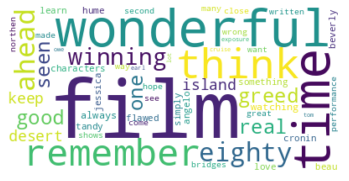

In [30]:
word_cloud = WordCloud(collocations = True, background_color = 'white').generate(str(new_data.review[900]))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
new_data.review[1644]

'unrealistic movie ever seen believe writer director see almost movie looks like one example impossible killer stay cold glaze hours get quickly get electrocuted trough water pipe like movie believe domain saw cut pipes hour easy let say chain made steel water pipe rusty made iron try cut foot saw faint best case likely die hart fails get bone shin exampl'

In [32]:
new_data['review']=new_data['review'].astype('string')

In [33]:
new_data.dtypes


review       string
sentiment     int64
dtype: object

In [34]:
new_data

,review,sentiment
0,one reviewers mentioned watching episode hooke...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


In [35]:
new_data['sentiment'].iloc[:5000].value_counts()

0    2532
1    2468
Name: sentiment, dtype: int64

/home/gaurav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

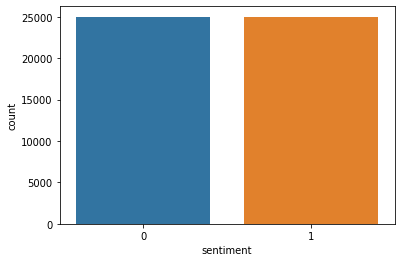

In [36]:
import seaborn as sns
sns.countplot(new_data['sentiment'])

In [37]:
good=[]
for msg in new_data[new_data['sentiment']==1]['review'].tolist():
    for word in msg.split():
        good.append(word)

In [38]:
len(good)

2959294

In [39]:
from collections import Counter

/home/gaurav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


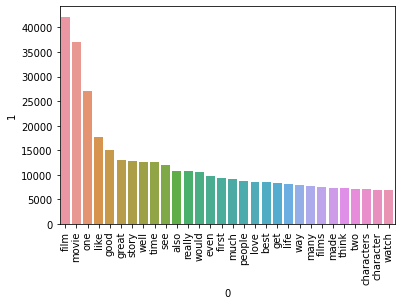

In [40]:
sns.barplot(pd.DataFrame(Counter(good).most_common(30))[0],pd.DataFrame(Counter(good).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
bad=[]
for msg in new_data[new_data['sentiment']==0]['review'].tolist():
    for word in msg.split():
        bad.append(word)

In [42]:
len(bad)

2868607

/home/gaurav/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


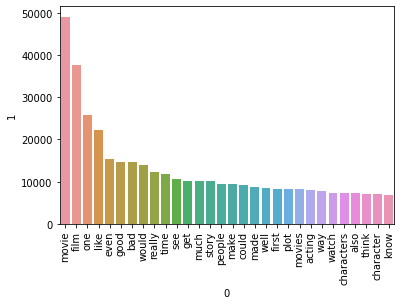

In [43]:
sns.barplot(pd.DataFrame(Counter(bad).most_common(30))[0],pd.DataFrame(Counter(bad).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()

In [45]:
X=cv.fit_transform(new_data['review'].iloc[:5000]).toarray()

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
X.shape

(5000, 38918)

In [48]:
y=new_data['sentiment'].iloc[:5000].values
y

array([1, 1, 1, ..., 1, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [53]:
model_mnb=MultinomialNB()
model_mnb.fit(X_train,y_train)


MultinomialNB()

In [54]:
predict=model_mnb.predict(X_test)

accuracy_score(y_test,predict)

0.818

In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(stemer.stem(i))
    
            
    return " ".join(y)

In [70]:
message="It is the best movie in the world it fighting scenes are very good I love this film"
text=transform_text(message)
text

'best movi world fight scene good love film'

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/gaurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
model_mnb.predict(cv.transform([text]))[0]

1

In [136]:
print(precision_score(y_test,predict))
confusion_matrix(y_test,predict)

0.8529411764705882


array([[470,  60],
       [122, 348]])

In [72]:
import pickle

In [74]:
filename='sentiment_modelNB.pkl'
pickle.dump(model_mnb,open(filename,'wb'))



In [ ]:
pickle.dump(cv,open('vectorizer.pkl','wb'))

## test the best model

In [137]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()

In [138]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [139]:
p=bnb.predict(X_test)

In [140]:
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(confusion_matrix(y_test,p))

0.834
0.8318777292576419
[[453  77]
 [ 89 381]]


In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

In [142]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [143]:
p=bnb.predict(X_test)

In [144]:
print(accuracy_score(y_test,p))
print(precision_score(y_test,p))
print(confusion_matrix(y_test,p))

0.834
0.8318777292576419
[[453  77]
 [ 89 381]]
